#### Import packages that we need

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string

In [243]:
## Load the amazon product data
products = pd.read_csv('amazon_baby.csv',dtype=dict_type)

#### Fill the n/a review columns with empty string.
##### Otherwise they will result in error while cleaning of punctuation

In [244]:
products = products.fillna({'review':''})


In [245]:
def remove_punctuation(text):
    return text.translate(None, string.punctuation) 

products['review_clean'] = products['review'].apply(remove_punctuation)

In [246]:
text = ",,This shouldn't be done, as it's not the right !!!way!!!"
print remove_punctuation(text)

This shouldnt be done as its not the right way


In [247]:
## Remove the products with rating equals to 3
products = products[products['rating'] != 3]

In [248]:
len(products)

166752

In [249]:
# Create a new column in the dataframe 'sentiment' 
# This new column will record the sentiment as +1 if rating > , else -1
# This way whole dataset will be divided in two class (+1,-1) and will be used for binary classification problem
products['sentiment'] = products['rating'].apply(lambda x: +1 if x > 3 else -1)

In [250]:
# Load the indicies to be used for training and test data
train_index = pd.read_json('module-2-assignment-train-idx.json')
test_index = pd.read_json('module-2-assignment-test-idx.json')

# Create training and test data using indicies
train_data = products.iloc[train_index.values.flatten(),]
test_data = products.iloc[test_index.values.flatten(),]
print train_data.shape
print test_data.shape

(133416, 5)
(33336, 5)


#### Build the word count vector for each review

In [251]:
# Simple model based on 'Bag of words' features is being used.
# Using CountVectorizer from sklearn for 'Bag of Words'
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

# Fit training data (this will create the vocabulary (feature set)) too, so need to use same vocab for test data also.
train_matrix = vectorizer.fit_transform(train_data['review_clean'])

#Convert test data into sparse matrix
test_matrix = vectorizer.transform(test_data['review_clean'])

In [311]:
l = vectorizer.vocabulary_.keys()

In [312]:
### Check CountVectorizer vocab
sentiment_model_coef_table = pd.DataFrame({'word':l,
                                         'coefficient':model.coef_.flatten()})
#print simple_model_coef_table.shape
#print vectorizer.vocabulary_.viewkeys()

In [314]:
sentiment_model_coef_table.sort_values('coefficient',ascending=False)

,coefficient,word
80934,2.014504,itempro
10112,2.011566,911
81177,1.993826,easywhen
40372,1.951560,discretionary
36155,1.950238,2350
91891,1.905856,alarmed
78982,1.865811,producton
89901,1.865090,wifiif
76453,1.835400,thinks
47504,1.834475,bagwhat


In [252]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_matrix, train_data['sentiment'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Question 1

In [253]:
print 'Number of weights >= 0 are', model.coef_[model.coef_ >= 0].flatten().shape[0]


Number of weights >= 0 are 87194


In [255]:
def sigmoid(score):
    return (1.0 / (1 + np.exp(-1 * score)))

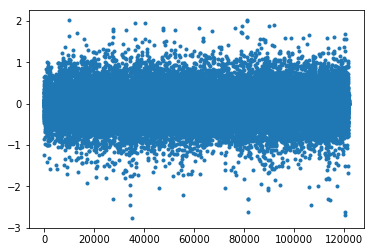

In [256]:
%matplotlib inline
plt.plot(xrange(model.coef_.shape[1]), model.coef_.reshape(1, -1).flatten(),'.')

In [264]:
sample_test_data = test_data[10:13]

In [265]:
sample_test_matrix = vectorizer.transform(sample_test_data['review_clean'])
sample_test_score = model.decision_function(sample_test_matrix) 
print sample_test_score

[  5.60129879  -3.17005306 -10.42408041]


In [266]:
predicion_based_score = sample_test_score > 0
predicion_based_score

array([ True, False, False], dtype=bool)

In [267]:
print sample_test_data['sentiment']

59    1
71   -1
91   -1
Name: sentiment, dtype: int64


In [268]:
### Probability of sample test data
prob = sigmoid(sample_test_score)
print prob

[  9.96320524e-01   4.03083629e-02   2.97075268e-05]


In [269]:
### Check the probabilities from sigmoid is same as ones fro model prediction
prediction = model.predict_proba(sample_test_matrix)
print prediction[:,1]

[  9.96320524e-01   4.03083629e-02   2.97075268e-05]


In [270]:
## Get the probabilities of full test data
full_prediction_prob = model.predict_proba(test_matrix)[:,1]

## Get the indicies in descending sorted order, 
indicies = np.argsort(-full_prediction_prob)
full_prediction_prob = full_prediction_prob[indicies]

In [271]:
# Get indicies for top 20 high probabilities
top_20 = indicies[0:19]
print top_20

[32782 15732 20743 24899 11923 17558 24286 30634 25554 21531  9555 18112
 14482  9125 26830 30535  4140 33060 30076]


In [272]:
print test_data.iloc[top_20]['name']

180646        Mamas &amp; Papas 2014 Urbo2 Stroller - Black
87017       Baby Einstein Around The World Discovery Center
114796    Fisher-Price Cradle 'N Swing,  My Little Snuga...
137034           Graco Pack 'n Play Element Playard - Flint
66059          Evenflo 6 Pack Classic Glass Bottle, 4-Ounce
97325     Freemie Hands-Free Concealable Breast Pump Col...
133651                    Britax 2012 B-Agile Stroller, Red
168697    Graco FastAction Fold Jogger Click Connect Str...
140816           Diono RadianRXT Convertible Car Seat, Plum
119182    Roan Rocco Classic Pram Stroller 2-in-1 with B...
52631     Evenflo X Sport Plus Convenience Stroller - Ch...
100166    Infantino Wrap and Tie Baby Carrier, Black Blu...
80155     Simple Wishes Hands-Free Breastpump Bra, Pink,...
50315            P'Kolino Silly Soft Seating in Tias, Green
147949    Baby Jogger City Mini GT Single Stroller, Shad...
168081    Buttons Cloth Diaper Cover - One Size - 8 Colo...
22586        Britax Decathlon Convertibl

In [274]:
# Get indicies for top 20 high probabilities
bottom_20 = indicies[-21:-1]
print bottom_20

[18983 15062  5831   205 28120 27231 13751 31226  7310  1810 10814 20594
  1942 14711  9655 17069 28184  8818 13939 21700]


In [275]:
print test_data.iloc[bottom_20]['name']

105055                  Angelcare Baby Sound Monitor, White
83234         Thirsties Hemp Inserts 2 Pack, Small 6-18 Lbs
31741                Regalo My Cot Portable Bed, Royal Blue
1116                  Safety 1st Deluxe 4-in-1 Bath Station
154878    VTech Communications Safe &amp; Sound Digital ...
149987                     NUK Cook-n-Blend Baby Food Maker
75994            Peg-Perego Tatamia High Chair, White Latte
172090    Belkin WeMo Wi-Fi Baby Monitor for Apple iPhon...
40079     Chicco Cortina KeyFit 30 Travel System in Adve...
9915           Cosco Alpha Omega Elite Convertible Car Seat
59546                Ellaroo Mei Tai Baby Carrier - Hershey
113995    Motorola Digital Video Baby Monitor with Room ...
10677                     Philips AVENT Newborn Starter Set
81332                 Cloth Diaper Sprayer--styles may vary
53207                   Safety 1st High-Def Digital Monitor
94560     The First Years True Choice P400 Premium Digit...
155287    VTech Communications Safe &amp

In [276]:
def accuracy(prediction, output):
    # Just take the difference, for this problem, abs difference will be 2 
    # 1 - (-1) = 2
    # -1 - (1) = abs 2
    worngs = abs(prediction - output).sum() / 2
    return (len(prediction) - worngs) * 1.0 / len(prediction)

In [277]:
print 'Sentiment model accuracy on test data =', accuracy(model.predict(test_matrix),test_data['sentiment'])

Sentiment model accuracy on test data = 0.932295416367


In [279]:
### Vocab for simple model
### This model will do 'Bag of Words' feature extractor for these words only
significant_words = ['love', 'great', 'easy', 'old', 'little', 'perfect', 'loves', 
      'well', 'able', 'car', 'broke', 'less', 'even', 'waste', 'disappointed', 
      'work', 'product', 'money', 'would', 'return']

In [280]:
vectorizer_word_subset = CountVectorizer(vocabulary=significant_words) # limit to 20 words
train_matrix_word_subset = vectorizer_word_subset.fit_transform(train_data['review_clean'])
test_matrix_word_subset = vectorizer_word_subset.transform(test_data['review_clean'])

In [282]:
simple_model = LogisticRegression()
simple_model.fit(train_matrix_word_subset, train_data['sentiment'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [283]:
simple_model_coef_table = pd.DataFrame({'word':significant_words,
                                         'coefficient':simple_model.coef_.flatten()})
print simple_model_coef_table.shape

(20, 2)


In [286]:
### Print cofficient in descending order
simple_model_coef_table.sort_values('coefficient',ascending=False)

,coefficient,word
6,1.673074,loves
5,1.509812,perfect
0,1.363690,love
2,1.192538,easy
1,0.944000,great
4,0.520186,little
7,0.503760,well
8,0.190909,able
3,0.085513,old
9,0.058855,car


In [287]:
prediction_train_data_sentiment_model = model.predict(train_matrix)
print 'Accuracy of sentiment model on train data = ', accuracy(prediction_train_data_sentiment_model, train_data['sentiment'])

Accuracy of sentiment model on train data =  0.968504527193


In [288]:
prediction_train_data_simple_model = simple_model.predict(train_matrix_word_subset)
print 'Accuracy of simple model on train data = ', accuracy(prediction_train_data_simple_model, train_data['sentiment'])

Accuracy of simple model on train data =  0.866822570007


In [289]:
prediction_test_data_sentiment_model = model.predict(test_matrix)
print 'Accuracy of sentiment model on test data = ', accuracy(prediction_test_data_sentiment_model, test_data['sentiment'])

Accuracy of sentiment model on test data =  0.932295416367


In [290]:
prediction_test_data_simple_model = simple_model.predict(test_matrix_word_subset)
print 'Accuracy of simple model on test data = ', accuracy(prediction_test_data_simple_model, test_data['sentiment'])

Accuracy of simple model on test data =  0.869360451164


#### Majority class classifier
### This will assign all example with majority class

In [291]:
### Check which class is the majority class in the training data
if  train_data['sentiment'].sum() > 0:
    majority_class = 1
else:
    majority_class = -1
    
print majority_class

1


In [292]:
### So as per majority class classifier, we will mark all as 1
### So, total number of wrong prediction will be number of -1 in test data
test_data_negative_class = test_data[test_data['sentiment'] == -1]

In [293]:
len(test_data_negative_class)

5241

In [294]:
print 'Accuracy of majority class on test data = ', (len(test_data) - len(test_data_negative_class)) * 1.0 / len(test_data)

Accuracy of majority class on test data =  0.842782577394


# All quiz question can be answered from this notebook